<a href="https://colab.research.google.com/github/nceder/qpb4e/blob/main/code/Chapter%2021/Chapter_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21 Processing data files

### 21.2.1 Text encoding: ASCII, Unicode, and others

In [ ]:
open('test.txt', 'wb').write(bytes([65, 66, 67, 255, 192,193]))

6

In [ ]:
x = open('test.txt').read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 3: invalid start byte

In [ ]:
open('test.txt', errors='ignore').read()

'ABC'

In [ ]:
open('test.txt', errors='replace').read()

65533

In [ ]:
open('test.txt', errors='surrogateescape').read()

'ABC\udcff\udcc0\udcc1'

In [ ]:
open('test.txt', errors='backslashreplace').read()

'ABC\\xff\\xc0\\xc1'

### 21.2.2 Unstructured text

In [ ]:
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2021/moby_01.txt &> null  && echo Downloaded


Downloaded


In [ ]:
moby_text = open("moby_01.txt").read()         #A
moby_paragraphs = moby_text.split("\n\n")     #B
print(moby_paragraphs[1])

There now is your insular city of the Manhattoes, belted round by wharves
as Indian isles by coral reefs -commerce surrounds it with her surf.
Right and left, the streets take you waterward.  Its extreme downtown
is the battery, where that noble mole is washed by waves, and cooled
by breezes, which a few hours previous were out of sight of land.
Look at the crowds of water-gazers there.



In [ ]:
moby_text = open("moby_01.txt").read()        #A
moby_paragraphs = moby_text.split("\n\n")
moby = moby_paragraphs[1].lower()             #B
moby = moby.replace(".", "")                  #C
moby = moby.replace(",", "")                  #D
moby_words = moby.split()
print(moby_words)

['there', 'now', 'is', 'your', 'insular', 'city', 'of', 'the', 'manhattoes', 'belted', 'round', 'by', 'wharves', 'as', 'indian', 'isles', 'by', 'coral', 'reefs', '-commerce', 'surrounds', 'it', 'with', 'her', 'surf', 'right', 'and', 'left', 'the', 'streets', 'take', 'you', 'waterward', 'its', 'extreme', 'downtown', 'is', 'the', 'battery', 'where', 'that', 'noble', 'mole', 'is', 'washed', 'by', 'waves', 'and', 'cooled', 'by', 'breezes', 'which', 'a', 'few', 'hours', 'previous', 'were', 'out', 'of', 'sight', 'of', 'land', 'look', 'at', 'the', 'crowds', 'of', 'water-gazers', 'there']


### 21.2.3 Delimited flat files

#### File 21.1 temp_data_ pipes_00a.txt

In [ ]:
%%writefile temp_data_pipes_00a.txt
Notes
State|Month Day, Year Code|Avg Daily Max Air Temperature (F)|Record Count for Daily Max Air Temp (F)
Illinois|1979/01/01|17.48|994
Illinois|1979/01/02|4.64|994
Illinois|1979/01/03|11.05|994
Illinois|1979/01/04|9.51|994
Illinois|1979/05/15|68.42|994
Illinois|1979/05/16|70.29|994
Illinois|1979/05/17|75.34|994
Illinois|1979/05/18|79.13|994
Illinois|1979/05/19|74.94|994


Writing temp_data_pipes_00a.txt


In [ ]:
line = "Illinois|1979/01/01|17.48|994"
print(line.split("|"))

['Illinois', '1979/01/01', '17.48', '994']


### 21.2.4 The csv module

In [ ]:
results = []
for line in open("temp_data_pipes_00a.txt"):
    fields = line.strip().split("|")
    results.append(fields)

results

[['Notes'],
 ['State',
  'Month Day, Year Code',
  'Avg Daily Max Air Temperature (F)',
  'Record Count for Daily Max Air Temp (F)'],
 ['Illinois', '1979/01/01', '17.48', '994'],
 ['Illinois', '1979/01/02', '4.64', '994'],
 ['Illinois', '1979/01/03', '11.05', '994'],
 ['Illinois', '1979/01/04', '9.51', '994'],
 ['Illinois', '1979/05/15', '68.42', '994'],
 ['Illinois', '1979/05/16', '70.29', '994'],
 ['Illinois', '1979/05/17', '75.34', '994'],
 ['Illinois', '1979/05/18', '79.13', '994'],
 ['Illinois', '1979/05/19', '74.94', '994']]

In [ ]:
import csv
results = [fields for fields in csv.reader(open("temp_data_pipes_00a.txt", newline=''), delimiter="|")]
results

[['Notes'],
 ['State',
  'Month Day, Year Code',
  'Avg Daily Max Air Temperature (F)',
  'Record Count for Daily Max Air Temp (F)'],
 ['Illinois', '1979/01/01', '17.48', '994'],
 ['Illinois', '1979/01/02', '4.64', '994'],
 ['Illinois', '1979/01/03', '11.05', '994'],
 ['Illinois', '1979/01/04', '9.51', '994'],
 ['Illinois', '1979/05/15', '68.42', '994'],
 ['Illinois', '1979/05/16', '70.29', '994'],
 ['Illinois', '1979/05/17', '75.34', '994'],
 ['Illinois', '1979/05/18', '79.13', '994'],
 ['Illinois', '1979/05/19', '74.94', '994']]

#### File 21.2 temp_data_01.csv

In [ ]:
%%writefile temp_data_01.csv
"Notes","State","State Code","Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Record Count for Daily Max Air Temp (F),Min Temp for Daily Max Air Temp (F),Max Temp for Daily Max Air Temp (F),Avg Daily Max Heat Index (F),Record Count for Daily Max Heat Index (F),Min for Daily Max Heat Index (F),Max for Daily Max Heat Index (F),Daily Max Heat Index (F) % Coverage

,"Illinois","17","Jan 01, 1979","1979/01/01",17.48,994,6.00,30.50,Missing,0,Missing,Missing,0.00%
,"Illinois","17","Jan 02, 1979","1979/01/02",4.64,994,-6.40,15.80,Missing,0,Missing,Missing,0.00%
,"Illinois","17","Jan 03, 1979","1979/01/03",11.05,994,-0.70,24.70,Missing,0,Missing,Missing,0.00%
,"Illinois","17","Jan 04, 1979","1979/01/04",9.51,994,0.20,27.60,Missing,0,Missing,Missing,0.00%
,"Illinois","17","May 15, 1979","1979/05/15",68.42,994,61.00,75.10,Missing,0,Missing,Missing,0.00%
,"Illinois","17","May 16, 1979","1979/05/16",70.29,994,63.40,73.50,Missing,0,Missing,Missing,0.00%
,"Illinois","17","May 17, 1979","1979/05/17",75.34,994,64.00,80.50,82.60,2,82.40,82.80,0.20%
,"Illinois","17","May 18, 1979","1979/05/18",79.13,994,75.50,82.10,81.42,349,80.20,83.40,35.11%
,"Illinois","17","May 19, 1979","1979/05/19",74.94,994,66.90,83.10,82.87,78,81.60,85.20,7.85%


Writing temp_data_01.csv


In [ ]:
results2 = [fields for fields in csv.reader(open("temp_data_01.csv", newline=''))]
print(results2)

[['Notes', 'State', 'State Code', 'Month Day, Year', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)', 'Min Temp for Daily Max Air Temp (F)', 'Max Temp for Daily Max Air Temp (F)', 'Avg Daily Max Heat Index (F)', 'Record Count for Daily Max Heat Index (F)', 'Min for Daily Max Heat Index (F)', 'Max for Daily Max Heat Index (F)', 'Daily Max Heat Index (F) % Coverage'], [], ['', 'Illinois', '17', 'Jan 01, 1979', '1979/01/01', '17.48', '994', '6.00', '30.50', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 02, 1979', '1979/01/02', '4.64', '994', '-6.40', '15.80', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 03, 1979', '1979/01/03', '11.05', '994', '-0.70', '24.70', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'Jan 04, 1979', '1979/01/04', '9.51', '994', '0.20', '27.60', 'Missing', '0', 'Missing', 'Missing', '0.00%'], ['', 'Illinois', '17', 'May 15, 1979

### 21.2.5 Reading a csv file as a list of dictionaries

In [ ]:
results = [fields for fields in csv.DictReader(open("temp_data_01.csv", newline=''))]
results[0]

{'Notes': '',
 'State': 'Illinois',
 'State Code': '17',
 'Month Day, Year': 'Jan 01, 1979',
 'Month Day, Year Code': '1979/01/01',
 'Avg Daily Max Air Temperature (F)': '17.48',
 'Record Count for Daily Max Air Temp (F)': '994',
 'Min Temp for Daily Max Air Temp (F)': '6.00',
 'Max Temp for Daily Max Air Temp (F)': '30.50',
 'Avg Daily Max Heat Index (F)': 'Missing',
 'Record Count for Daily Max Heat Index (F)': '0',
 'Min for Daily Max Heat Index (F)': 'Missing',
 'Max for Daily Max Heat Index (F)': 'Missing',
 'Daily Max Heat Index (F) % Coverage': '0.00%'}

In [ ]:
results[0]['State']

'Illinois'


# 21.3 Excel files

In [ ]:
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2021/temp_data_01.xlsx &> null  && echo Downloaded


Downloaded


In [ ]:
from openpyxl import load_workbook
wb = load_workbook('temp_data_01.xlsx')
results = []
ws = wb.worksheets[0]
for row in ws.iter_rows():
    results.append([cell.value for cell in row])

print(results)

[['Notes', 'State', 'State Code', 'Month Day, Year', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)', 'Min Temp for Daily Max Air Temp (F)', 'Max Temp for Daily Max Air Temp (F)', 'Avg Daily Max Heat Index (F)', 'Record Count for Daily Max Heat Index (F)', 'Min for Daily Max Heat Index (F)', 'Max for Daily Max Heat Index (F)', 'Daily Max Heat Index (F) % Coverage'], [None, 'Illinois', 17, 'Jan 01, 1979', '1979/01/01', 17.48, 994, 6, 30.5, 'Missing', 0, 'Missing', 'Missing', '0.00%'], [None, 'Illinois', 17, 'Jan 02, 1979', '1979/01/02', 4.64, 994, -6.4, 15.8, 'Missing', 0, 'Missing', 'Missing', '0.00%'], [None, 'Illinois', 17, 'Jan 03, 1979', '1979/01/03', 11.05, 994, -0.7, 24.7, 'Missing', 0, 'Missing', 'Missing', '0.00%'], [None, 'Illinois', 17, 'Jan 04, 1979', '1979/01/04', 9.51, 994, 0.2, 27.6, 'Missing', 0, 'Missing', 'Missing', '0.00%'], [None, 'Illinois', 17, 'May 15, 1979', '1979/05/15', 68.42, 994, 61, 75.1, 'Missing', 0, '

## 21.4.2 Sorting

In [ ]:
%%writefile datafile
ZZZZZZ
CCCCCC
QQQQQQ
AAAAAA

Writing datafile


In [ ]:
lines = open("datafile").readlines()
lines.sort()
print(lines)

['AAAAAA\n', 'CCCCCC\n', 'QQQQQQ\n', 'ZZZZZZ\n']


In [ ]:
! sort datafile > datafile.srt
! cat datafile.srt

AAAAAA
CCCCCC
QQQQQQ
ZZZZZZ


In [ ]:
lines.sort(key=str.lower)

In [ ]:
lines.sort(key=lambda x: x[5:])

# 21.5 Writing data files

## 21.5.1 CSV and other delimited files

In [ ]:
temperature_data = [['State', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)'], ['Illinois', '1979/01/01', '17.48', '994'], ['Illinois', '1979/01/02', '4.64', '994'], ['Illinois', '1979/01/03', '11.05', '994'], ['Illinois', '1979/01/04', '9.51', '994'], ['Illinois', '1979/05/15', '68.42', '994'], ['Illinois', '1979/05/16', '70.29', '994'], ['Illinois', '1979/05/17', '75.34', '994'], ['Illinois', '1979/05/18', '79.13', '994'], ['Illinois', '1979/05/19', '74.94', '994']]
csv.writer(open("temp_data_03.csv", "w", newline='')).writerows(temperature_data)

In [ ]:
data = [{'State': 'Illinois',
 'Month Day, Year Code': '1979/01/01',
 'Avg Daily Max Air Temperature (F)': '17.48',
 'Record Count for Daily Max Air Temp (F)': '994'}]
fields = ['State', 'Month Day, Year Code', 'Avg Daily Max Air Temperature (F)', 'Record Count for Daily Max Air Temp (F)']
dict_writer = csv.DictWriter(open("temp_data_04.csv", "w"), fieldnames=fields)
dict_writer.writeheader()
dict_writer.writerows(data)
del dict_writer

[{'State': 'Illinois', 'Month Day, Year Code': '1979/01/01', 'Avg Daily Max Air Temperature (F)': '17.48', 'Record Count for Daily Max Air Temp (F)': '994'}]


## 21.5.2 Writing Excel files.

In [ ]:
from openpyxl import Workbook
data_rows = [fields for fields in csv.reader(open("temp_data_01.csv"))]
wb = Workbook()
ws = wb.active
ws.title = "temperature data"
for row in data_rows:
    ws.append(row)

wb.save("temp_data_02.xlsx")

# 21.6 Lab 21 Weather observations

The file of weather observations provided here (`Illinois_weather_1979-2011.txt`) is by month and then by county for the state of Illinois from 1979 to 2011. Write the code to process this file to extract the data for Chicago (Cook County) into a single CSV or spreadsheet file.

This process includes replacing the `'Missing'` strings with empty strings and translating the percentage to a decimal. You may also consider what fields are repetitive (and therefore can be omitted or stored elsewhere). The proof that you've got it right occurs when you load the file into a spreadsheet.

In [1]:
!wget https://raw.githubusercontent.com/nceder/qpb4e/main/code/Chapter%2021/Illinois_weather_1979-2011.txt &> null  && echo Downloaded

Downloaded


## Human solution

In [2]:
data = open("Illinois_weather_1979-2011.txt").readlines()
data[:11]

['"Notes"\t"Month"\t"Month Code"\t"County"\t"County Code"\tAvg Daily Max Air Temperature (F)\tRecord Count for Daily Max Air Temp (F)\tMin Temp for Daily Max Air Temp (F)\tMax Temp for Daily Max Air Temp (F)\tAvg Daily Min Air Temperature (F)\tRecord Count for Daily Min Air Temp (F)\tMin Temp for Daily Min Air Temp (F)\tMax Temp for Daily Min Air Temp (F)\tAvg Daily Max Heat Index (F)\tRecord Count for Daily Max Heat Index (F)\tMin for Daily Max Heat Index (F)\tMax for Daily Max Heat Index (F)\tDaily Max Heat Index (F) % Coverage\n',
 '\t"Jan"\t"1"\t"Adams County, IL"\t"17001"\t31.89\t19437\t-10.00\t68.90\t18.01\t19437\t-26.20\t50.30\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Jan"\t"1"\t"Alexander County, IL"\t"17003"\t41.07\t6138\t2.60\t73.20\t26.48\t6138\t-14.00\t60.30\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Jan"\t"1"\t"Bond County, IL"\t"17005"\t35.71\t6138\t-2.70\t69.50\t22.18\t6138\t-17.90\t57.20\tMissing\t0\tMissing\tMissing\t0.00%\n',
 '\t"Jan"\t"1"\t"Boone County, IL"\

In [3]:
import csv

with (open("Illinois_weather_1979-2011.txt") as infile,
      open("Illinois_weather_1979-2011.csv", "w") as outfile):
    for row in csv.reader(infile, delimiter="\t"):
        if row[0] == '---':
            break
        del row[0:2]
        row = [item.replace("Missing", "") for item in row]
        row[-1] = row[-1].replace("%", "")
        row[-1] = float(row[-1]) / 100  if str.isdigit(row[-1]) else row[-1]
        csv.writer(outfile).writerow(row)


### Remaining Steps

1. Download weather_history.csv to your machine.
2. Import weather_history.cvs into a spreadsheet (e.g. Google sheets or Excel)
3. Select data and insert chart. (creating a graph may be somewhat different in different applications.)

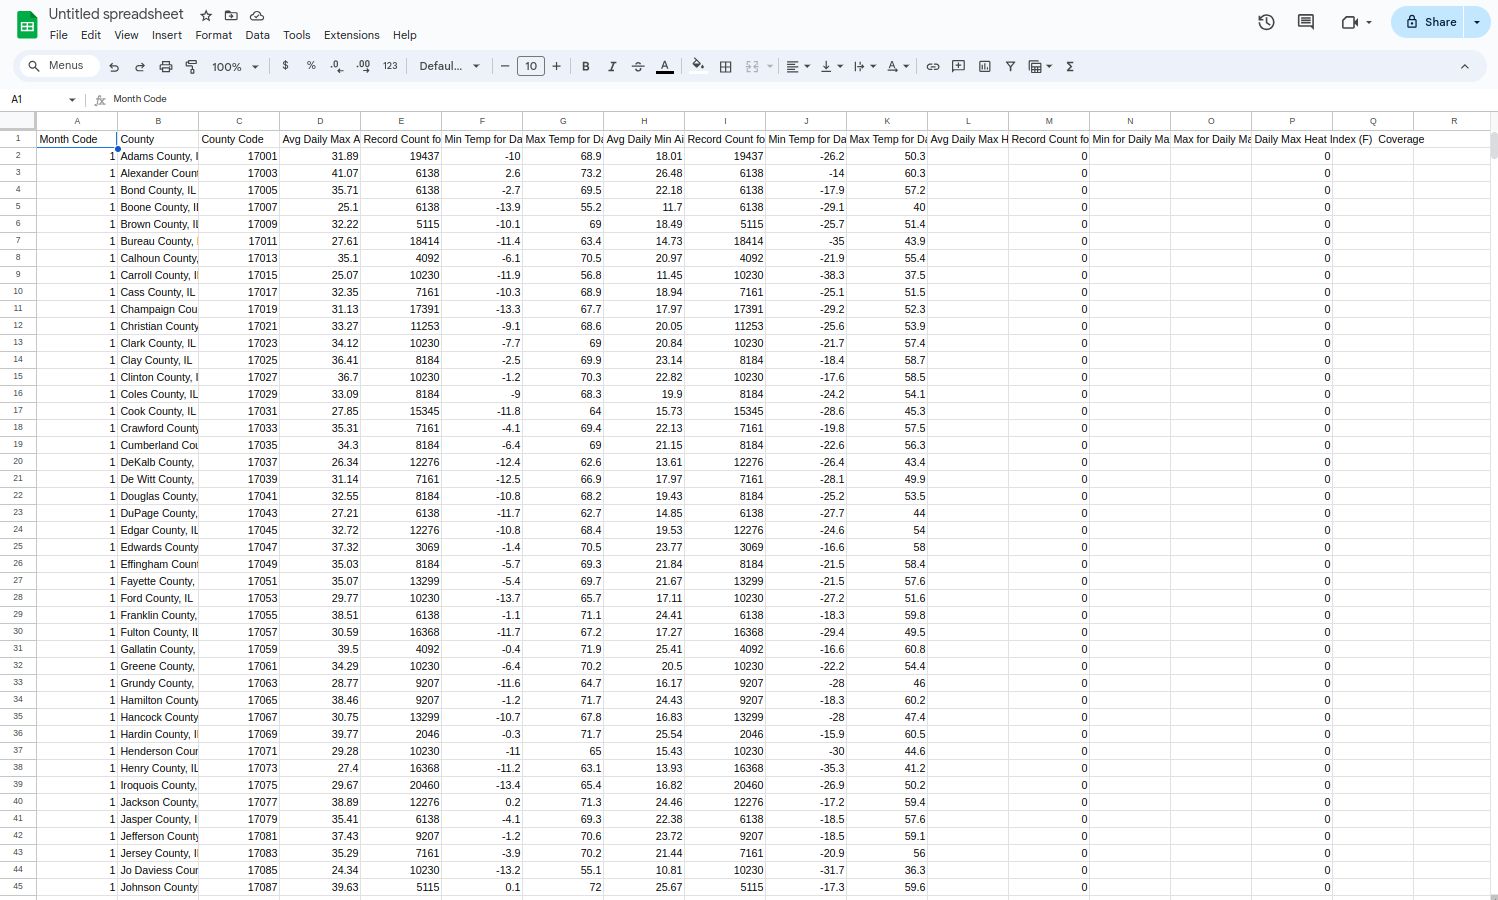